<a href="https://colab.research.google.com/github/hfsuluova/CE888/blob/main/Lab_8/FL%26FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/lab8/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [7]:
import os

data_dir_list = os.listdir('/content/data')
#print(data_dir_list)
path, dir, file = next(os.walk("/content/data"))

In [8]:
categories = {} 
for i in dir:
  categories[i] = dir.index(i)
print(categories)


{'Humans': 0, 'dogs': 1, 'cats': 2, 'horses': 3}


In [9]:
import cv2
import numpy as np
from random import shuffle
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

In [11]:
from sklearn.model_selection import train_test_split
train_val_images, test_images, train_val_labels, test_labels = train_test_split(images, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [12]:
train_images, val_images, train_labels, val_labels = train_test_split(train_val_images,train_val_labels,
                                                     stratify=train_val_labels, 
                                                     test_size=0.2)

In [13]:
print("No of images in trainig:", len(train_images))
print("No of images in Validation:",len(val_images))
print("No of images in Testing:",len(test_images))

No of images in trainig: 516
No of images in Validation: 130
No of images in Testing: 162


In [14]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Input,GlobalAveragePooling2D
from tensorflow.keras import Model

img_input = Input(shape=(224, 224, 3))

In [15]:
model = InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    )
model.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________

In [23]:
last_layer = model.get_layer('avg_pool').output
out = Dense(4, activation='softmax', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [27]:
history = model.fit(train_images, train_labels,
                               batch_size=16,
                               epochs=10, 
                               validation_data=(val_images, val_labels))

Epoch 1/10
33/33 [==============================] - 58s 2s/step - loss: 0.4460 - acc: 0.8450 - val_loss: 0.2362 - val_acc: 0.9154
Epoch 2/10
33/33 [==============================] - 57s 2s/step - loss: 0.1339 - acc: 0.9671 - val_loss: 0.1478 - val_acc: 0.9615
Epoch 3/10
33/33 [==============================] - 57s 2s/step - loss: 0.0829 - acc: 0.9787 - val_loss: 0.1091 - val_acc: 0.9769
Epoch 4/10
33/33 [==============================] - 57s 2s/step - loss: 0.0549 - acc: 0.9922 - val_loss: 0.0916 - val_acc: 0.9846
Epoch 5/10
33/33 [==============================] - 57s 2s/step - loss: 0.0435 - acc: 0.9942 - val_loss: 0.0911 - val_acc: 0.9769
Epoch 6/10
33/33 [==============================] - 57s 2s/step - loss: 0.0304 - acc: 0.9981 - val_loss: 0.0793 - val_acc: 0.9846
Epoch 7/10
33/33 [==============================] - 57s 2s/step - loss: 0.0229 - acc: 1.0000 - val_loss: 0.0758 - val_acc: 0.9846
Epoch 8/10
33/33 [==============================] - 57s 2s/step - loss: 0.0194 - acc: 1.00

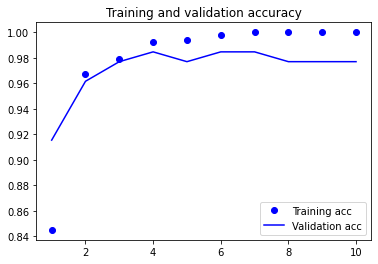

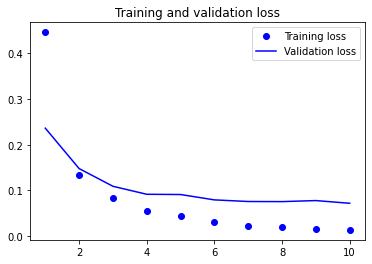

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

6/6 [==============================] - 14s 2s/step - loss: 0.1285 - acc: 0.9568


In [30]:
print("Accuracy on test set:", test_acc)

Accuracy on test set: 0.9567901492118835


In [31]:
base_model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    )
base_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
______________________

In [55]:
from keras.models import Sequential
add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dense(4, activation='softmax'))

Model_FT = add_model



for layer in Model_FT.layers[:-2]:
	layer.trainable = False

Model_FT.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 8196      
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_________________________________________________________________


In [56]:
Model_FT.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [57]:
history_FT = Model_FT.fit(train_images, train_labels,
                               batch_size=16,
                               epochs=20, 
                               validation_data=(val_images, val_labels))

Epoch 1/20
33/33 [==============================] - 62s 2s/step - loss: 13.6859 - acc: 0.2557 - val_loss: 6.9748 - val_acc: 0.3231
Epoch 2/20
33/33 [==============================] - 57s 2s/step - loss: 3.8173 - acc: 0.2930 - val_loss: 2.1844 - val_acc: 0.4154
Epoch 3/20
33/33 [==============================] - 57s 2s/step - loss: 1.5516 - acc: 0.4482 - val_loss: 1.8046 - val_acc: 0.4538
Epoch 4/20
33/33 [==============================] - 57s 2s/step - loss: 1.6737 - acc: 0.4694 - val_loss: 1.3822 - val_acc: 0.5000
Epoch 5/20
33/33 [==============================] - 57s 2s/step - loss: 1.7983 - acc: 0.4843 - val_loss: 2.0105 - val_acc: 0.3692
Epoch 6/20
33/33 [==============================] - 57s 2s/step - loss: 1.5560 - acc: 0.5091 - val_loss: 1.3111 - val_acc: 0.5154
Epoch 7/20
33/33 [==============================] - 57s 2s/step - loss: 1.1783 - acc: 0.5426 - val_loss: 1.6941 - val_acc: 0.4231
Epoch 8/20
33/33 [==============================] - 57s 2s/step - loss: 1.3178 - acc: 0.5

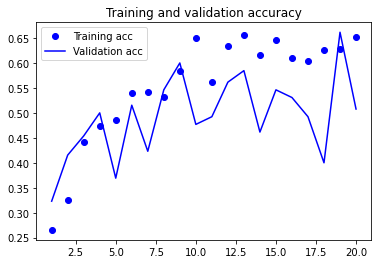

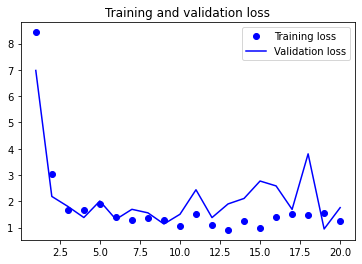

In [58]:
import matplotlib.pyplot as plt

acc_FT = history_FT.history['acc']
val_acc_FT = history_FT.history['val_acc']
loss_FT = history_FT.history['loss']
val_loss_FT = history_FT.history['val_loss']

epochs = range(1, len(acc_FT) + 1)

plt.plot(epochs, acc_FT, 'bo', label='Training acc')
plt.plot(epochs, val_acc_FT, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_FT, 'bo', label='Training loss')
plt.plot(epochs, val_loss_FT, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [60]:
test_loss, test_acc = Model_FT.evaluate(test_images,test_labels)

6/6 [==============================] - 14s 2s/step - loss: 1.6238 - acc: 0.5185


In [ ]:
#FT implementation is not successful